In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import ast
import tikzplotlib
from common import analyse_results, expand_sparsity_explanation_rate_necessary, expand_sparsity_explanation_rate_sufficient, calculate_similarity_scores, heatmap, annotate_heatmap

In [2]:
sns.set_theme(style='white', palette='deep')
sns.set_context('paper', font_scale=2)

# Analyze Results for the UCI Dataset

## 1. Data Loading

### 1.1. Load the results

In [3]:
# Load results for CoDy
cody_random = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_random.parquet')
cody_temporal = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_recent.parquet')
cody_spatio_temporal = pd.read_parquet('../results/uci/cody/results_uci_cody_spatio-temporal.parquet')
cody_1_delta = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_1-best.parquet')

cody_random_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_random_wrong_only.parquet')
cody_temporal_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_recent_wrong_only.parquet')
cody_spatio_temporal_w = pd.read_parquet('../results/uci/cody/results_uci_cody_spatio-temporal_wrong_only.parquet')
cody_1_delta_w = pd.read_parquet('../results/uci/cody/results_uci_cftgnnexplainer_1-best_wrong_only.parquet')

In [4]:
# Load results for Greedy Baseline
greedy_random = pd.read_parquet('../results/uci/greedy/results_uci_greedy_random.parquet')
greedy_temporal = pd.read_parquet('../results/uci/greedy/results_uci_greedy_recent.parquet')
greedy_spatio_temporal = pd.read_parquet('../results/uci/greedy/results_uci_greedy_spatio-temporal.parquet')
greedy_1_delta = pd.read_parquet('../results/uci/greedy/results_uci_greedy_1-best.parquet')

greedy_random_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_random_wrong_only.parquet')
greedy_temporal_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_recent_wrong_only.parquet')
greedy_spatio_temporal_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_spatio-temporal_wrong_only.parquet')
greedy_1_delta_w = pd.read_parquet('../results/uci/greedy/results_uci_greedy_1-best_wrong_only.parquet')

In [5]:
# Load resutls from TGNNExplainer
tgnnex = pd.read_parquet('../results/uci/tgnnexplainer/results_uci_tgnnexplainer.parquet')

tgnnex_w = pd.read_parquet('../results/uci/tgnnexplainer/results_uci_tgnnexplainer_wrong_only.parquet')

### 1.2. Run analysis

In [6]:
# Analyze results for CoDy
results_cody_random = analyse_results(cody_random, 'random')
results_cody_temporal = analyse_results(cody_temporal, 'temporal')
results_cody_spatio_temporal = analyse_results(cody_spatio_temporal, 'spatio-temporal')
results_cody_1_delta = analyse_results(cody_1_delta, '1-delta')

results_cody_random_w = analyse_results(cody_random_w, 'random')
results_cody_temporal_w = analyse_results(cody_temporal_w, 'temporal')
results_cody_spatio_temporal_w = analyse_results(cody_spatio_temporal_w, 'spatio-temporal')
results_cody_1_delta_w = analyse_results(cody_1_delta_w, '1-delta')

In [7]:
# Analyze results for Greedy Baseline
results_greedy_random = analyse_results(greedy_random, 'random')
results_greedy_temporal = analyse_results(greedy_temporal, 'temporal')
results_greedy_spatio_temporal = analyse_results(greedy_spatio_temporal, 'spatio-temporal')
results_greedy_1_delta = analyse_results(greedy_1_delta, '1-delta')

results_greedy_random_w = analyse_results(greedy_random_w, 'random')
results_greedy_temporal_w = analyse_results(greedy_temporal_w, 'temporal')
results_greedy_spatio_temporal_w = analyse_results(greedy_spatio_temporal_w, 'spatio-temporal')
results_greedy_1_delta_w = analyse_results(greedy_1_delta_w, '1-delta')

In [8]:
# Analyze results for TGNNExplainer

tgnnex['cf_example_event_ids'] = tgnnex['explanation_event_ids']
tgnnex['orig_prediction_tgnnexplainer'] = tgnnex['original_prediction']
tgnnex.drop('original_prediction', axis=1, inplace=True)
tgnnex = pd.merge(tgnnex, cody_random[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
tgnnex['achieves_counterfactual_explanation'] = tgnnex['original_prediction'] * tgnnex['counterfactual_prediction'] < 0

tgnnex_w['cf_example_event_ids'] = tgnnex_w['explanation_event_ids']
tgnnex_w['orig_prediction_tgnnexplainer'] = tgnnex_w['original_prediction']
tgnnex_w.drop('original_prediction', axis=1, inplace=True)
tgnnex_w = pd.merge(tgnnex_w, cody_random_w[['explained_event_id', 'original_prediction']], how='inner', on='explained_event_id')
tgnnex_w['achieves_counterfactual_explanation'] = tgnnex_w['original_prediction'] * tgnnex_w['counterfactual_prediction'] < 0

results_tgnnex = analyse_results(tgnnex, '-')

results_tgnnex_w = analyse_results(tgnnex_w, '-')

### 1.3. Put data into dataframes

In [9]:
# Instantiate CoDy dataframes
for dataframe in [results_cody_random, results_cody_temporal, results_cody_spatio_temporal, results_cody_1_delta]:
    dataframe['Explainer'] = 'CoDy'
cody = pd.DataFrame([results_cody_random, results_cody_temporal, results_cody_spatio_temporal, results_cody_1_delta])
results_cody_random = pd.DataFrame([results_cody_random])
results_cody_temporal = pd.DataFrame([results_cody_temporal])
results_cody_spatio_temporal = pd.DataFrame([results_cody_spatio_temporal])
results_cody_1_delta = pd.DataFrame([results_cody_1_delta])

for dataframe in [results_cody_random_w, results_cody_temporal_w, results_cody_spatio_temporal_w, results_cody_1_delta_w]:
    dataframe['Explainer'] = 'CoDy'
cody_w = pd.DataFrame([results_cody_random_w, results_cody_temporal_w, results_cody_spatio_temporal_w, results_cody_1_delta_w])
results_cody_random_w = pd.DataFrame([results_cody_random_w])
results_cody_temporal_w = pd.DataFrame([results_cody_temporal_w])
results_cody_spatio_temporal_w = pd.DataFrame([results_cody_spatio_temporal_w])
results_cody_1_delta_w = pd.DataFrame([results_cody_1_delta_w])

In [10]:
# Instantiate Greedy Baseline dataframes
for dataframe in [results_greedy_random, results_greedy_temporal, results_greedy_spatio_temporal, results_greedy_1_delta]:
    dataframe['Explainer'] = 'Greedy'
greedy = pd.DataFrame([results_greedy_random, results_greedy_temporal, results_greedy_spatio_temporal, results_greedy_1_delta])
results_greedy_random = pd.DataFrame([results_greedy_random])
results_greedy_temporal = pd.DataFrame([results_greedy_temporal])
results_greedy_spatio_temporal = pd.DataFrame([results_greedy_spatio_temporal])
results_greedy_1_delta = pd.DataFrame([results_greedy_1_delta])

for dataframe in [results_greedy_random_w, results_greedy_temporal_w, results_greedy_spatio_temporal_w, results_greedy_1_delta_w]:
    dataframe['Explainer'] = 'Greedy'
greedy_w = pd.DataFrame([results_greedy_random_w, results_greedy_temporal_w, results_greedy_spatio_temporal_w, results_greedy_1_delta_w])
results_greedy_random_w = pd.DataFrame([results_greedy_random_w])
results_greedy_temporal_w = pd.DataFrame([results_greedy_temporal_w])
results_greedy_spatio_temporal_w = pd.DataFrame([results_greedy_spatio_temporal_w])
results_greedy_1_delta_w = pd.DataFrame([results_greedy_1_delta_w])

In [11]:
# Instantiate TGNNExplainer dataframes
results_tgnnex['Explainer'] = 'TGNNExplainer'
tgnnexplainer = pd.DataFrame([results_tgnnex])

results_tgnnex_w['Explainer'] = 'TGNNExplainer'
tgnnexplainer_w = pd.DataFrame([results_tgnnex_w])

In [12]:
# Combined datasets
correct_predictions = pd.concat([tgnnexplainer, greedy, cody])

wrong_predictions = pd.concat([tgnnexplainer_w, greedy_w, cody_w])

In [13]:
results_cody_1_delta_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_1_delta)
results_cody_spatio_temporal_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_spatio_temporal)
results_cody_random_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_random)
results_cody_temporal_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_temporal)

results_greedy_1_delta_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_1_delta)
results_greedy_spatio_temporal_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_spatio_temporal)
results_greedy_random_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_random)
results_greedy_temporal_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_temporal)

tgnnexplainer_e_nec = expand_sparsity_explanation_rate_necessary(tgnnexplainer)


results_cody_1_delta_w_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_1_delta_w)
results_cody_spatio_temporal_w_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_spatio_temporal_w)
results_cody_random_w_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_random_w)
results_cody_temporal_w_e_nec = expand_sparsity_explanation_rate_necessary(results_cody_temporal_w)

results_greedy_1_delta_w_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_1_delta_w)
results_greedy_spatio_temporal_w_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_spatio_temporal_w)
results_greedy_random_w_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_random_w)
results_greedy_temporal_w_e_nec = expand_sparsity_explanation_rate_necessary(results_greedy_temporal_w)

tgnnexplainer_w_e_nec = expand_sparsity_explanation_rate_necessary(tgnnexplainer_w)

In [14]:
results_cody_1_delta_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_1_delta)
results_cody_spatio_temporal_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_spatio_temporal)
results_cody_random_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_random)
results_cody_temporal_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_temporal)

results_greedy_1_delta_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_1_delta)
results_greedy_spatio_temporal_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_spatio_temporal)
results_greedy_random_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_random)
results_greedy_temporal_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_temporal)

tgnnexplainer_e_suf = expand_sparsity_explanation_rate_sufficient(tgnnexplainer)


results_cody_1_delta_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_1_delta_w)
results_cody_spatio_temporal_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_spatio_temporal_w)
results_cody_random_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_random_w)
results_cody_temporal_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_cody_temporal_w)

results_greedy_1_delta_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_1_delta_w)
results_greedy_spatio_temporal_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_spatio_temporal_w)
results_greedy_random_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_random_w)
results_greedy_temporal_w_e_suf = expand_sparsity_explanation_rate_sufficient(results_greedy_temporal_w)

tgnnexplainer_w_e_suf = expand_sparsity_explanation_rate_sufficient(tgnnexplainer_w)

### 1.4. Set Mappings

In [15]:
explainer_mapping = {
    'CoDy': 'o',
    'Greedy': 'X',
    'TGNNExplainer': 'v'
}

selection_strategy_mapping = {
    'random': 'tab:green',
    'spatio-temporal': 'tab:red',
    'temporal': 'tab:orange',
    '1-delta': 'tab:blue',
    '-': 'k'
}

## 2. Analysis

### 2.1. Fidelity Analysis

$fid_+ = 1 - \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(p(f(\mathcal{G}(t_i)), \varepsilon_i) = p(f(\mathcal{G}(t_i) \setminus \mathcal{X}_{\varepsilon_i}, \varepsilon_i)))$

$fid_- = 1 - \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(p(f(\mathcal{G}(t_i)), \varepsilon_i) = p(f(\mathcal{X}_{\varepsilon_i}, \varepsilon_i)))$

$sparsity = \frac{1}{N} \sum_{i = 1}^N \frac{|\mathcal{X}_{\varepsilon_i}|}{|C(\mathcal{G}, \varepsilon_i, k, m_{max})|}$

### 2.1.1 $Fidelity_+$

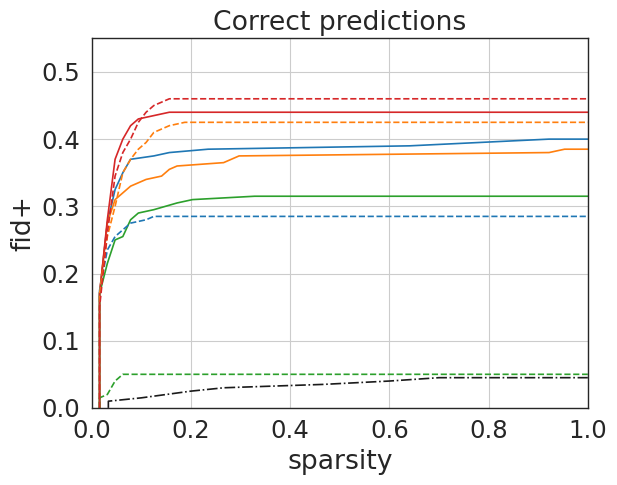

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_delta_e_nec['sparsity_necessary'], results_cody_1_delta_e_nec['necessary explanation rate'], color='tab:blue')
ax.plot(results_cody_temporal_e_nec['sparsity_necessary'], results_cody_temporal_e_nec['necessary explanation rate'], color='tab:orange')
ax.plot(results_cody_random_e_nec['sparsity_necessary'], results_cody_random_e_nec['necessary explanation rate'], color='tab:green')
ax.plot(results_cody_spatio_temporal_e_nec['sparsity_necessary'], results_cody_spatio_temporal_e_nec['necessary explanation rate'], color='tab:red')

ax.plot(results_greedy_1_delta_e_nec['sparsity_necessary'], results_greedy_1_delta_e_nec['necessary explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_temporal_e_nec['sparsity_necessary'], results_greedy_temporal_e_nec['necessary explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_e_nec['sparsity_necessary'], results_greedy_random_e_nec['necessary explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_spatio_temporal_e_nec['sparsity_necessary'], results_greedy_spatio_temporal_e_nec['necessary explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_e_nec['sparsity_necessary'], tgnnexplainer_e_nec['necessary explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 0.55])

ax.set_title('Correct predictions')

plt.xlabel('sparsity')
plt.ylabel('fid+')

plt.grid(True)

tikzplotlib.save('../plots/fid_spar_uci.tex')
plt.savefig('../plots/svg/fid_spar_uci.svg')

plt.show()

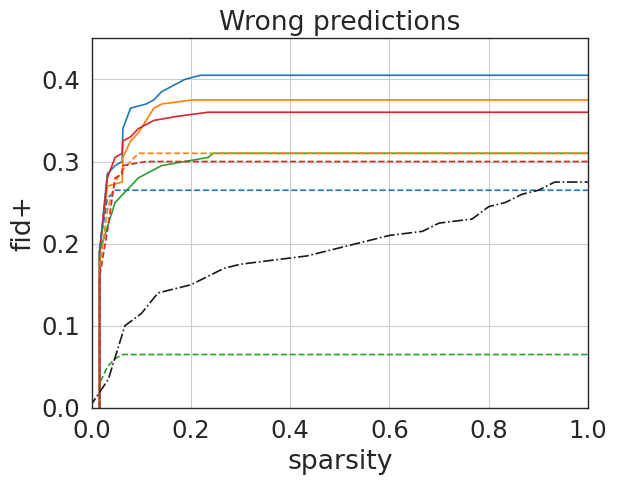

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_delta_w_e_nec['sparsity_necessary'], results_cody_1_delta_w_e_nec['necessary explanation rate'], color='tab:blue')
ax.plot(results_cody_temporal_w_e_nec['sparsity_necessary'], results_cody_temporal_w_e_nec['necessary explanation rate'], color='tab:orange')
ax.plot(results_cody_random_w_e_nec['sparsity_necessary'], results_cody_random_w_e_nec['necessary explanation rate'], color='tab:green')
ax.plot(results_cody_spatio_temporal_w_e_nec['sparsity_necessary'], results_cody_spatio_temporal_w_e_nec['necessary explanation rate'], color='tab:red')

ax.plot(results_greedy_1_delta_w_e_nec['sparsity_necessary'], results_greedy_1_delta_w_e_nec['necessary explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_temporal_w_e_nec['sparsity_necessary'], results_greedy_temporal_w_e_nec['necessary explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_w_e_nec['sparsity_necessary'], results_greedy_random_w_e_nec['necessary explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_spatio_temporal_w_e_nec['sparsity_necessary'], results_greedy_spatio_temporal_w_e_nec['necessary explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_w_e_nec['sparsity_necessary'], tgnnexplainer_w_e_nec['necessary explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 0.45])

ax.set_title('Wrong predictions')

plt.xlabel('sparsity')
plt.ylabel('fid+')

plt.grid(True)

tikzplotlib.save('../plots/fid_spar_uci_wrong.tex')

plt.savefig('../plots/svg/fid_spar_uci_wrong.svg')

plt.show()

### 2.1.2 $Fidelity_-$

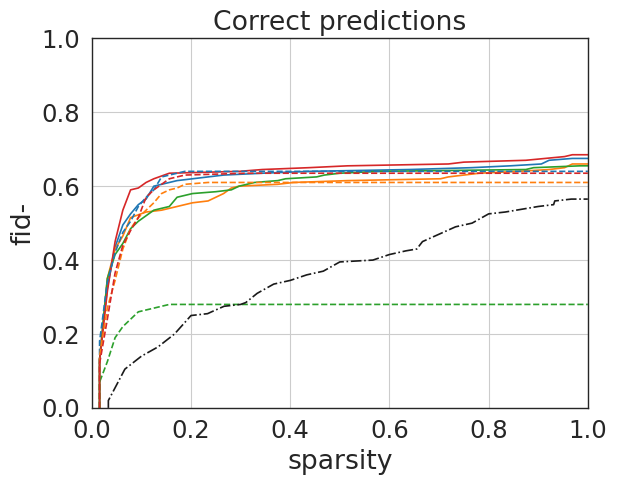

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_delta_e_suf['sparsity_sufficient'], results_cody_1_delta_e_suf['sufficient explanation rate'], color='tab:blue')
ax.plot(results_cody_temporal_e_suf['sparsity_sufficient'], results_cody_temporal_e_suf['sufficient explanation rate'], color='tab:orange')
ax.plot(results_cody_random_e_suf['sparsity_sufficient'], results_cody_random_e_suf['sufficient explanation rate'], color='tab:green')
ax.plot(results_cody_spatio_temporal_e_suf['sparsity_sufficient'], results_cody_spatio_temporal_e_suf['sufficient explanation rate'], color='tab:red')

ax.plot(results_greedy_1_delta_e_suf['sparsity_sufficient'], results_greedy_1_delta_e_suf['sufficient explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_temporal_e_suf['sparsity_sufficient'], results_greedy_temporal_e_suf['sufficient explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_e_suf['sparsity_sufficient'], results_greedy_random_e_suf['sufficient explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_spatio_temporal_e_suf['sparsity_sufficient'], results_greedy_spatio_temporal_e_suf['sufficient explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_e_suf['sparsity_sufficient'], tgnnexplainer_e_suf['sufficient explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_title('Correct predictions')

plt.xlabel('sparsity')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_min_spar_uci.tex')
plt.savefig('../plots/svg/fid_min_spar_uci.svg')

plt.show()

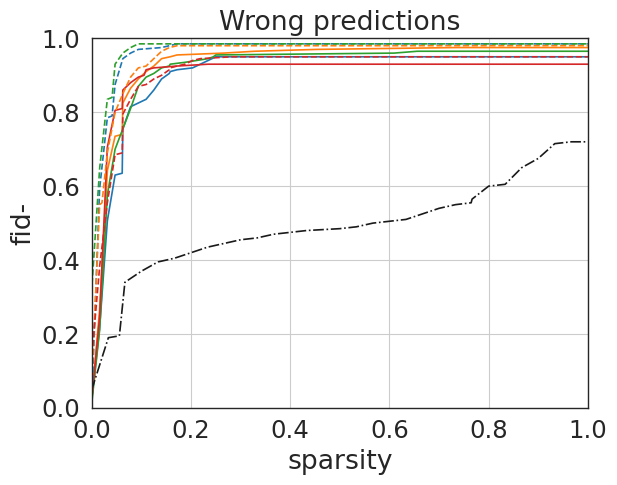

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(results_cody_1_delta_w_e_suf['sparsity_sufficient'], results_cody_1_delta_w_e_suf['sufficient explanation rate'], color='tab:blue')
ax.plot(results_cody_temporal_w_e_suf['sparsity_sufficient'], results_cody_temporal_w_e_suf['sufficient explanation rate'], color='tab:orange')
ax.plot(results_cody_random_w_e_suf['sparsity_sufficient'], results_cody_random_w_e_suf['sufficient explanation rate'], color='tab:green')
ax.plot(results_cody_spatio_temporal_w_e_suf['sparsity_sufficient'], results_cody_spatio_temporal_w_e_suf['sufficient explanation rate'], color='tab:red')

ax.plot(results_greedy_1_delta_w_e_suf['sparsity_sufficient'], results_greedy_1_delta_w_e_suf['sufficient explanation rate'], color='tab:blue', linestyle='dashed')
ax.plot(results_greedy_temporal_w_e_suf['sparsity_sufficient'], results_greedy_temporal_w_e_suf['sufficient explanation rate'], color='tab:orange', linestyle='dashed')
ax.plot(results_greedy_random_w_e_suf['sparsity_sufficient'], results_greedy_random_w_e_suf['sufficient explanation rate'], color='tab:green', linestyle='dashed')
ax.plot(results_greedy_spatio_temporal_w_e_suf['sparsity_sufficient'], results_greedy_spatio_temporal_w_e_suf['sufficient explanation rate'], color='tab:red', linestyle='dashed')

ax.plot(tgnnexplainer_w_e_suf['sparsity_sufficient'], tgnnexplainer_w_e_suf['sufficient explanation rate'], color='k', linestyle='-.')

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.set_title('Wrong predictions')

plt.xlabel('sparsity')
plt.ylabel('fid-')

plt.grid(True)

tikzplotlib.save('../plots/fid_min_spar_uci_wrong.tex')

plt.savefig('../plots/svg/fid_min_spar_uci_wrong.svg')

plt.show()

### 2.1.3 Convergent Analysis

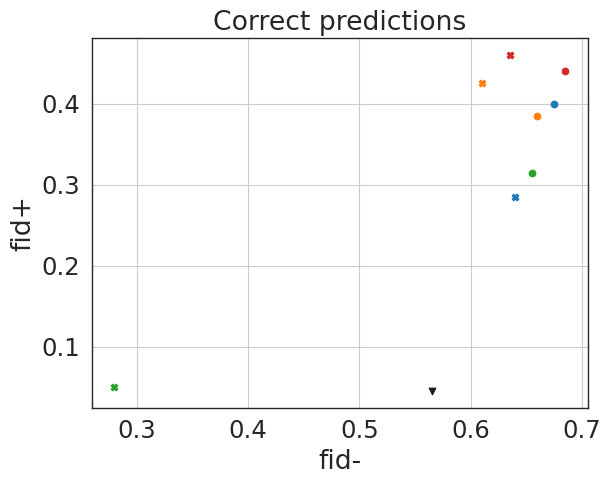

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for index, row in correct_predictions.iterrows():
    ax.scatter(row['fidelity_minus'], row['fidelity_plus'], c=selection_strategy_mapping[row['Selection strategy']], marker=explainer_mapping[row['Explainer']])

ax.set_title('Correct predictions')

plt.xlabel('fid-')
plt.ylabel('fid+')

plt.grid(True)

tikzplotlib.save('../plots/fid_plus_minus_uci.tex')

plt.savefig('../plots/svg/fid_plus_minus_uci.svg')

plt.show()

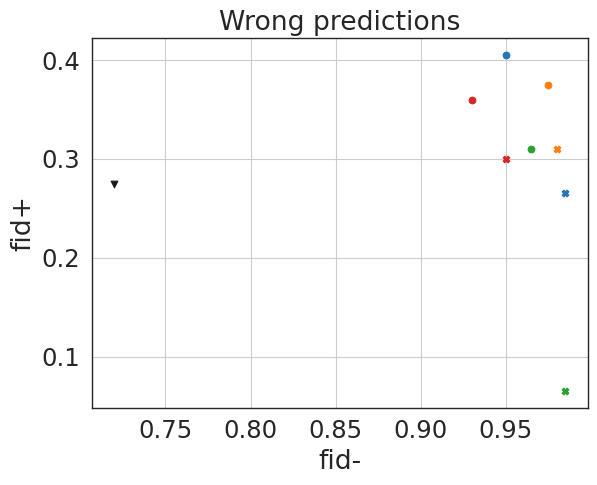

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for index, row in wrong_predictions.iterrows():
    ax.scatter(row['fidelity_minus'], row['fidelity_plus'], c=selection_strategy_mapping[row['Selection strategy']], marker=explainer_mapping[row['Explainer']])

ax.set_title('Wrong predictions')

plt.xlabel('fid-')
plt.ylabel('fid+')

plt.grid(True)

tikzplotlib.save('../plots/fid_plus_minus_uci_wrong.tex')

plt.savefig('../plots/svg/fid_plus_minus_uci_wrong.svg')

plt.show()

### 2.2. Runtime

/home/daniel/miniconda3/envs/analysis/lib/python3.9/site-packages/tikzplotlib/_hatches.py:65: UserWarning: tikzplotlib: Hatch '////' cannot be rendered. Only single character hatches are supported, e.g., {'/', '\', '|', '-', '+', 'x', 'o', 'O', '.', '*'}. Hatch '/' will be used.
  warnings.warn(


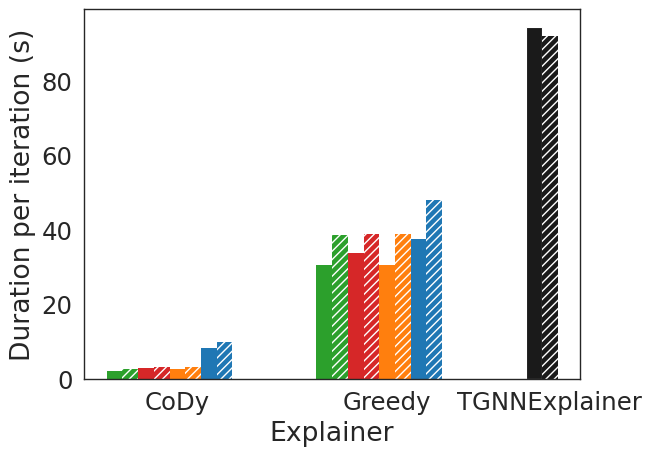

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = np.arange(2)

width = 0.075
multiplier = 0


for selection_strategy in [selection_strategy for selection_strategy in selection_strategy_mapping.keys() if selection_strategy != '-']:
    offset = width * multiplier
    durations = correct_predictions[correct_predictions['Selection strategy'] == selection_strategy]['Duration'].to_numpy()
    ax.bar(x + offset, durations, width, color=selection_strategy_mapping[selection_strategy], linewidth=0)
    multiplier += 1
    
    offset = width * multiplier
    durations = wrong_predictions[wrong_predictions['Selection strategy'] == selection_strategy]['Duration'].to_numpy()
    ax.bar(x + offset, durations, width, color=selection_strategy_mapping[selection_strategy], hatch='////', linewidth=0)
    multiplier += 1

ax.bar(2, tgnnex['total_duration'].mean()/1000000000, width, color='k')
ax.bar(2 + width, tgnnex_w['total_duration'].mean()/1000000000, width, color='k', hatch='////', linewidth=0)

ax.set_xticks((0.3, 1.3, 2.075), ('CoDy', 'Greedy', 'TGNNExplainer'))
ax.set_ylabel('Duration per iteration (s)')
ax.set_xlabel('Explainer')

tikzplotlib.save('../plots/duration_uci.tex')

plt.savefig('../plots/svg/duration_uci.svg')
    
plt.show()

### 2.3. Fidelity over Iterations

In [23]:
def fid_over_iterations(df:pd.DataFrame, max_val:int):
    iteration_sum = [-0.0000001]
    iterations = [-0.0000001]
    for iteration in np.sort(df['first_example_step'].unique()):
        iterations.append(iteration)
        iteration_sum.append(len(df[df['first_example_step'] <= iteration]))
    iterations = iterations[:-1]
    iterations.append(max_val)
    iteration_sum = iteration_sum[:-1]
    iteration_sum.append(iteration_sum[-1])
    iterations = np.array(iterations)
    fid_plus = np.array(iteration_sum)/len(df)
    return iterations, fid_plus

In [26]:
cody_temporal_1200 = pd.read_parquet('../results/uci/alterations/results_uci_cody_recent_1200.parquet')
cody_1_delta_1200 = pd.read_parquet('../results/uci/alterations/results_uci_cody_1-best_1200.parquet')
cody_random_1200 = pd.read_parquet('../results/uci/alterations/results_uci_cody_random_1200.parquet')
cody_spatio_temporal_1200 = pd.read_parquet('../results/uci/alterations/results_uci_cody_spatio-temporal_1200.parquet')
it, fid = fid_over_iterations(cody_temporal_1200, 1200)
it_1, fid_1 = fid_over_iterations(cody_1_delta_1200, 1200)
it_rand, fid_rand = fid_over_iterations(cody_random_1200, 1200)
it_clo, fid_clo = fid_over_iterations(cody_spatio_temporal_1200, 1200)

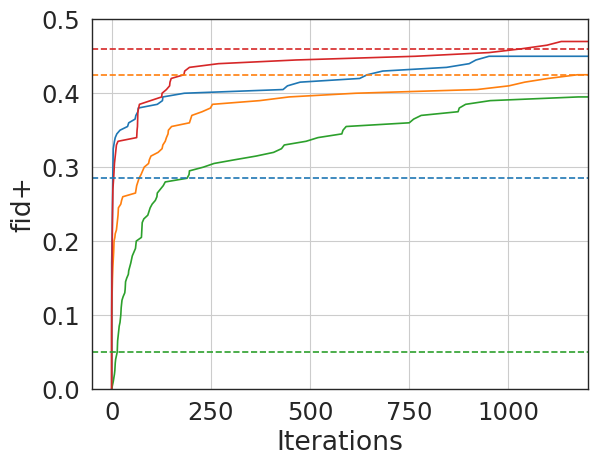

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(it, fid, color='tab:orange')
ax.plot(it_1, fid_1, color='tab:blue')
ax.plot(it_rand, fid_rand, color='tab:green')
ax.plot(it_clo, fid_clo, color='tab:red')
ax.axhline(y=results_greedy_temporal['fidelity_plus'][0], color='tab:orange', linestyle='dashed')
ax.axhline(y=results_greedy_spatio_temporal['fidelity_plus'][0], color='tab:red', linestyle='dashed')
ax.axhline(y=results_greedy_random['fidelity_plus'][0], color='tab:green', linestyle='dashed')
ax.axhline(y=results_greedy_1_delta['fidelity_plus'][0], color='tab:blue', linestyle='dashed')

ax.set_ylabel('fid+')
ax.set_xlabel('Iterations')

ax.set_xlim([-50, 1200])

ax.set_ylim([0, 0.5])

plt.grid(True)

tikzplotlib.save('../plots/fid_it_uci.tex')

plt.savefig('../plots/svg/fid_it_uci.svg')

plt.show()

### 2.4. Similarities

In [28]:
# Calculate the different similarity measures. This can take a while
results = [tgnnex, greedy_random, greedy_temporal, greedy_spatio_temporal, greedy_1_delta, cody_random, cody_temporal, cody_spatio_temporal, cody_1_delta]
precisions = np.zeros((len(results), len(results)))
recalls = np.zeros((len(results), len(results)))
f1s = np.zeros((len(results), len(results)))
jaccard_similarities = np.zeros((len(results), len(results)))
subset_accuracies = np.zeros((len(results), len(results)))
for index, result in enumerate(results):
    for inner_index, result_other in enumerate(results):
        precision, recall, f1, jaccard_similarity, subset_accuracy = calculate_similarity_scores(result, result_other)
        precisions[index][inner_index] = precision
        recalls[index][inner_index] = recall
        f1s[index][inner_index] = f1
        jaccard_similarities[index][inner_index] = jaccard_similarity
        subset_accuracies[index][inner_index] = subset_accuracy

results_w = [tgnnex_w, greedy_random_w, greedy_temporal_w, greedy_spatio_temporal_w, greedy_1_delta_w, cody_random_w, cody_temporal_w, cody_spatio_temporal_w, cody_1_delta_w]
precisions_w = np.zeros((len(results_w), len(results_w)))
recalls_w = np.zeros((len(results_w), len(results_w)))
f1s_w = np.zeros((len(results_w), len(results_w)))
jaccard_similarities_w = np.zeros((len(results_w), len(results_w)))
subset_accuracies_w = np.zeros((len(results), len(results)))
for index, result in enumerate(results_w):
    for inner_index, result_other in enumerate(results_w):
        precision, recall, f1, jaccard_similarity, subset_accuracy = calculate_similarity_scores(result, result_other)
        precisions_w[index][inner_index] = precision
        recalls_w[index][inner_index] = recall
        f1s_w[index][inner_index] = f1
        jaccard_similarities_w[index][inner_index] = jaccard_similarity
        subset_accuracies_w[index][inner_index] = subset_accuracy

In [29]:
labels = ['T-GNNExplainer', 'GreedyCF-random', 'GreedyCF-temporal', 'GreedyCF-spatio-temporal', 'GreedyCF-1-best', 'CoDy-random', 'CoDy-temporal', 'CoDy-spatio-temporal', 'CoDy-1-best']

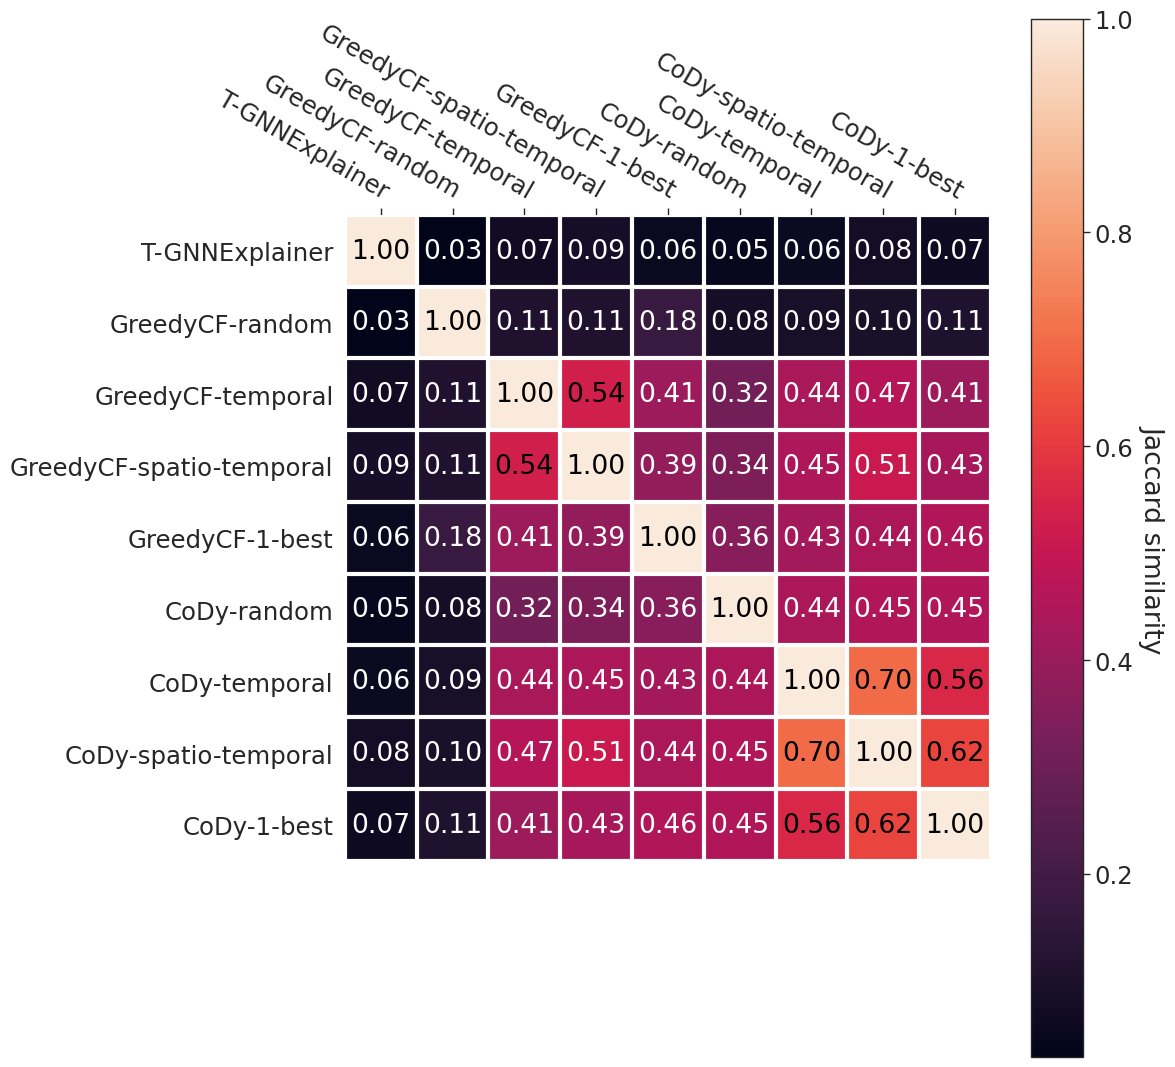

In [30]:
fig, ax = plt.subplots(figsize=(12,12))

im, cbar = heatmap(jaccard_similarities, labels, labels, ax=ax, cbarlabel="Jaccard similarity")
texts = annotate_heatmap(im, valfmt="{x:.2f}", textcolors=("white", "black"))

fig.tight_layout()

tikzplotlib.save('../plots/jaccard_similarity_uci.tex')

plt.show()

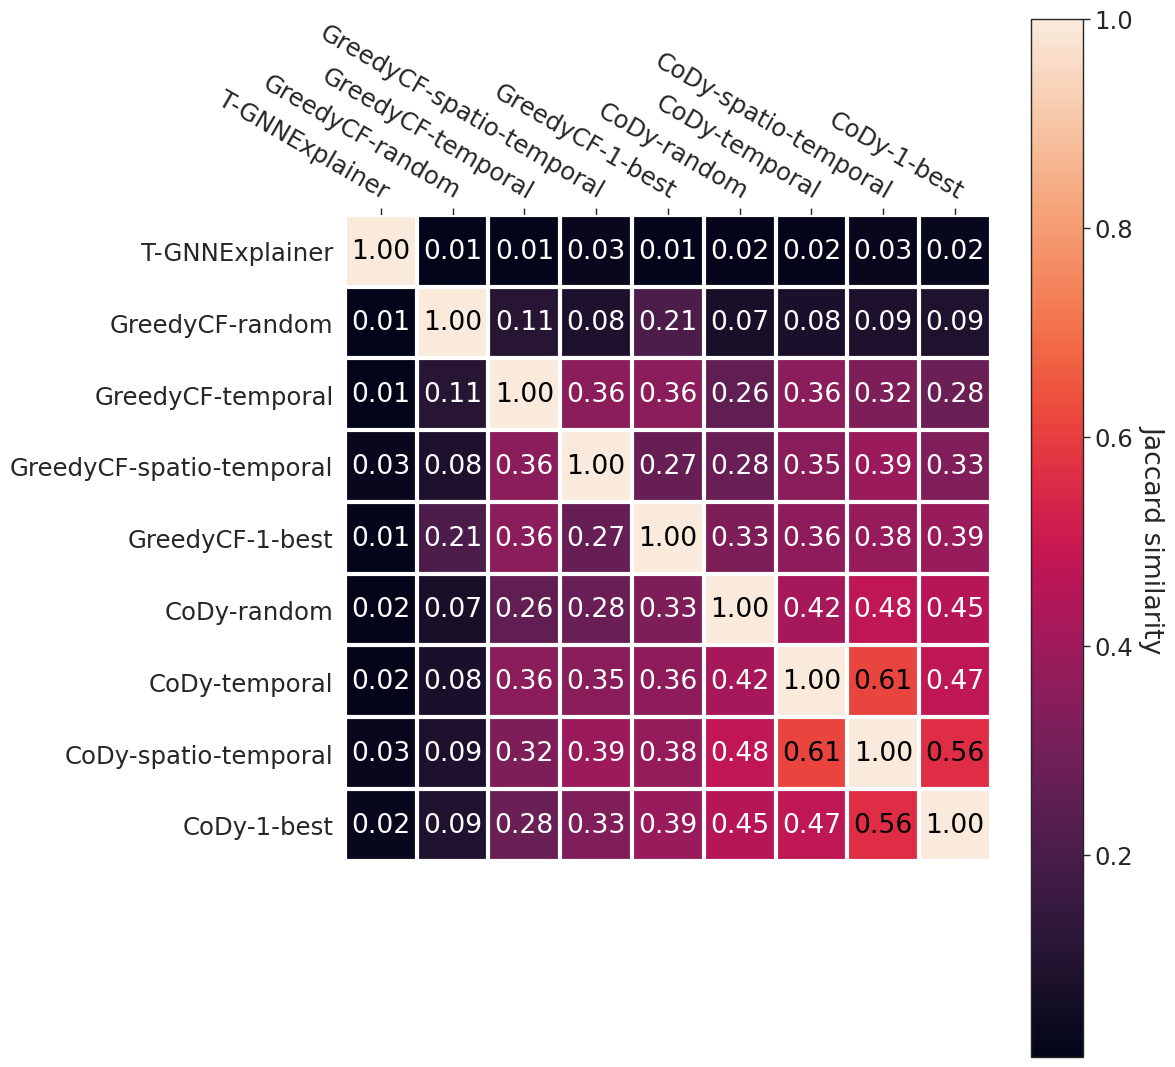

In [31]:
fig, ax = plt.subplots(figsize=(12,12))

im, cbar = heatmap(jaccard_similarities_w, labels, labels, ax=ax, cbarlabel="Jaccard similarity")
texts = annotate_heatmap(im, valfmt="{x:.2f}", textcolors=("white", "black"))

fig.tight_layout()

tikzplotlib.save('../plots/jaccard_similarity_uci_w.tex')

plt.show()

## 3. Tabular Analysis

### 3.1. Performance Overview

In [32]:
correct_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'characterization_score', 'AUFC_plus', 'AUFC_min']].to_csv('../tables/uci_correct.csv')
correct_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'characterization_score', 'AUFC_plus', 'AUFC_min']]

,Explainer,Selection strategy,fidelity_plus,fidelity_minus,characterization_score,AUFC_plus,AUFC_min
0,TGNNExplainer,-,0.045,0.565,0.083361,0.033917,0.362509
0,Greedy,random,0.050,0.280,0.084848,0.048320,0.267813
1,Greedy,temporal,0.425,0.610,0.500966,0.408126,0.577891
2,Greedy,spatio-temporal,0.460,0.635,0.533516,0.442188,0.600391
3,Greedy,1-delta,0.285,0.640,0.394378,0.277774,0.609767
0,CoDy,random,0.315,0.655,0.425412,0.302735,0.594024
1,CoDy,temporal,0.385,0.660,0.486316,0.361759,0.584258
2,CoDy,spatio-temporal,0.440,0.685,0.535822,0.426095,0.627774
3,CoDy,1-delta,0.400,0.675,0.502326,0.377970,0.613477


In [33]:
wrong_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'characterization_score', 'AUFC_plus', 'AUFC_min']].to_csv('../tables/uci_wrong.csv')
wrong_predictions[['Explainer', 'Selection strategy', 'fidelity_plus', 'fidelity_minus', 'characterization_score', 'AUFC_plus', 'AUFC_min']]

,Explainer,Selection strategy,fidelity_plus,fidelity_minus,characterization_score,AUFC_plus,AUFC_min
0,TGNNExplainer,-,0.275,0.720,0.397990,0.191167,0.493015
0,Greedy,random,0.065,0.985,0.121952,0.063399,0.970383
1,Greedy,temporal,0.310,0.980,0.471008,0.301954,0.952555
2,Greedy,spatio-temporal,0.300,0.950,0.456000,0.292354,0.913791
3,Greedy,1-delta,0.265,0.985,0.417640,0.260157,0.964233
0,CoDy,random,0.310,0.965,0.469255,0.298217,0.920064
1,CoDy,temporal,0.375,0.975,0.541667,0.361000,0.934635
2,CoDy,spatio-temporal,0.360,0.930,0.519070,0.348686,0.903066
3,CoDy,1-delta,0.405,0.950,0.567897,0.389053,0.904572


### 3.2 Sparsity

In [16]:
correct_predictions[['Explainer', 'Selection strategy', 'sparsity_necessary', 'sparsity_sufficient', 'sparsity_all']].round(2)

,Explainer,Selection strategy,sparsity_necessary,sparsity_sufficient,sparsity_all
0,TGNNExplainer,-,0.29,0.37,0.29
0,Greedy,random,0.04,0.05,0.02
1,Greedy,temporal,0.04,0.06,0.05
2,Greedy,spatio-temporal,0.04,0.06,0.05
3,Greedy,1-delta,0.03,0.05,0.04
0,CoDy,random,0.04,0.10,0.09
1,CoDy,temporal,0.07,0.12,0.10
2,CoDy,spatio-temporal,0.04,0.09,0.08
3,CoDy,1-delta,0.07,0.10,0.09


In [17]:
wrong_predictions[['Explainer', 'Selection strategy', 'sparsity_necessary', 'sparsity_sufficient', 'sparsity_all']].round(2)

,Explainer,Selection strategy,sparsity_necessary,sparsity_sufficient,sparsity_all
0,TGNNExplainer,-,0.32,0.33,0.35
0,Greedy,random,0.03,0.02,0.02
1,Greedy,temporal,0.03,0.03,0.03
2,Greedy,spatio-temporal,0.03,0.04,0.04
3,Greedy,1-delta,0.02,0.03,0.03
0,CoDy,random,0.04,0.06,0.06
1,CoDy,temporal,0.04,0.05,0.05
2,CoDy,spatio-temporal,0.04,0.04,0.04
3,CoDy,1-delta,0.04,0.05,0.06


### 3.2. Export Scatter

In [34]:
correct_predictions['meta'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
wrong_predictions['meta'] = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

correct_predictions[['meta', 'fidelity_plus', 'fidelity_minus']].to_csv('../tables/uci_fid_correct.csv', index=None, header=['meta', 'fid_min', 'fid_pl'])
wrong_predictions[['meta', 'fidelity_plus', 'fidelity_minus']].to_csv('../tables/uci_fid_wrong.csv', index=None, header=['meta', 'fid_min', 'fid_pl'])

In [35]:
correct_predictions['correct'] = True
wrong_predictions['correct'] = False

In [36]:
pd.concat((correct_predictions, wrong_predictions)).to_excel('../tables/ucif_full.xlsx')

In [38]:
pd.concat((results_cody_1_delta_w_e_nec, tgnnexplainer_w_e_nec, results_greedy_temporal_w_e_nec)).to_excel('../tables/ucif_expanded_wrong.xlsx')

In [39]:
pd.concat((results_cody_1_delta_e_nec, tgnnexplainer_e_nec, results_greedy_temporal_e_nec)).to_excel('../tables/ucif_expanded_correct.xlsx')

### 3.3. Runtime Overview

In [40]:
correct_runtime = correct_predictions[['Explainer', 'Selection strategy', 'avg_oracle_calls', 'initialisation (s)', 'explanation (s)', 'oracle calls (s)', 'Duration']]
correct_runtime['oracle_calls_pct'] = correct_runtime['oracle calls (s)']/correct_runtime['Duration']
correct_runtime['explanation_pct'] = correct_runtime['explanation (s)']/correct_runtime['Duration']

/tmp/ipykernel_103768/1218401292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_runtime['oracle_calls_pct'] = correct_runtime['oracle calls (s)']/correct_runtime['Duration']
/tmp/ipykernel_103768/1218401292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correct_runtime['explanation_pct'] = correct_runtime['explanation (s)']/correct_runtime['Duration']


In [41]:
correct_runtime

,Explainer,Selection strategy,avg_oracle_calls,initialisation (s),explanation (s),oracle calls (s),Duration,oracle_calls_pct,explanation_pct
0,TGNNExplainer,-,13726.215,0.045174,15.286912,78.976520,94.308606,0.837426,0.162095
0,Greedy,random,24.800,0.000093,0.004951,2.211229,2.216180,0.997766,0.002234
1,Greedy,temporal,36.150,0.000093,0.006790,2.753260,2.760051,0.997540,0.002460
2,Greedy,spatio-temporal,37.650,0.000063,0.009426,2.872782,2.882208,0.996730,0.003270
3,Greedy,1-delta,88.100,4.161968,0.025264,8.338679,8.363943,0.996979,0.003021
0,CoDy,random,261.125,0.000972,0.462441,30.140449,30.602891,0.984889,0.015111
1,CoDy,temporal,261.225,0.000656,0.728227,29.869874,30.598102,0.976200,0.023800
2,CoDy,spatio-temporal,260.950,0.001724,3.859454,29.906573,33.766027,0.885700,0.114300
3,CoDy,1-delta,312.000,0.061604,1.374776,35.995648,37.370424,0.963212,0.036788


In [42]:
wrong_runtime = wrong_predictions[['Explainer', 'Selection strategy', 'avg_oracle_calls', 'initialisation (s)', 'explanation (s)', 'oracle calls (s)', 'Duration']]
wrong_runtime['oracle_calls_pct'] = wrong_runtime['oracle calls (s)']/wrong_runtime['Duration']
wrong_runtime['explanation_pct'] = wrong_runtime['explanation (s)']/wrong_runtime['Duration']

/tmp/ipykernel_103768/3751994185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_runtime['oracle_calls_pct'] = wrong_runtime['oracle calls (s)']/wrong_runtime['Duration']
/tmp/ipykernel_103768/3751994185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_runtime['explanation_pct'] = wrong_runtime['explanation (s)']/wrong_runtime['Duration']


In [43]:
wrong_runtime

,Explainer,Selection strategy,avg_oracle_calls,initialisation (s),explanation (s),oracle calls (s),Duration,oracle_calls_pct,explanation_pct
0,TGNNExplainer,-,13667.660,0.064283,15.024532,76.792728,91.881544,0.835780,0.163521
0,Greedy,random,21.800,0.000096,0.004715,2.613382,2.618096,0.998199,0.001801
1,Greedy,temporal,29.150,0.000096,0.005850,3.086965,3.092814,0.998109,0.001891
2,Greedy,spatio-temporal,35.250,0.000063,0.008522,3.311452,3.319974,0.997433,0.002567
3,Greedy,1-delta,78.145,5.385983,0.024024,9.798720,9.822744,0.997554,0.002446
0,CoDy,random,257.255,0.001266,0.430622,38.022119,38.452741,0.988801,0.011199
1,CoDy,temporal,256.305,0.000662,0.597000,38.144586,38.741586,0.984590,0.015410
2,CoDy,spatio-temporal,256.440,0.002381,1.025481,37.670303,38.695783,0.973499,0.026501
3,CoDy,1-delta,305.695,0.069331,0.879864,47.184990,48.064854,0.981694,0.018306
